### Loading the required libraries: 

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import re
from collections import Counter  


In [192]:
df_anime = pd.read_csv('E:\\Applied AI Assignments\\Python\\Git Projects\\Anime-Recommendation\\Input data\\Anime dataset\\anime.csv')
df_rating = pd.read_csv('E:\\Applied AI Assignments\\Python\\Git Projects\\Anime-Recommendation\\Input data\\Anime dataset\\rating.csv')

In [193]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [194]:
df_anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

- We have around 62 null values in genre . Genre has multiple tags associated with it for a single record such as Drama , romance , thriller , scifi etc. So these values can be imputed by posing this problem as a multilabel classification.
<br>
- We have around 25 null values in type for which the corresponding episodes and ratings are also unknown.<br>
- We have around 230 null values in rating. Some of them are human errors such as Steins;Gate 0, One Punch Man 2.  These values can be used as a test set but we cant measure the effectivenes as we dont know their original ratings.<br>

Since we are focusing solely on the recommendation and the number of null values are small in number we will drop these values.

In [195]:
df_anime.dropna(inplace = True)

In [196]:
df_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [197]:
df_rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

We have no null values in the ratings dataset.

In [211]:
#Creating a new  dataset by using rating and anime.
data = pd.merge(df_rating , df_anime , on = 'anime_id',suffixes=('_user', '_anime'))
data_unknown = data[data['rating_user'] == -1]
data = data[data['rating_user']!= -1]

In [214]:
data.head(5)

,user_id,anime_id,rating_user,genre,type,episodes,rating_anime,members
1,3,20,8,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
5,21,20,8,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
6,28,20,9,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
7,34,20,9,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


### Information about the data: 

Description downloaded from Kaggle : https://www.kaggle.com/CooperUnion/anime-recommendations-database


**Anime.csv**

- anime_id - myanimelist.net's unique id identifying an anime.
- name - full name of anime.
- genre - comma separated list of genres for this anime.
- type - movie, TV, OVA, etc.
- episodes - how many episodes in this show. (1 if movie).
- rating - average rating out of 10 for this anime.
- members - number of community members that are in this anime's "group".

**Rating.csv**

- user_id - non identifiable randomly generated user id.
- anime_id - the anime that this user has rated.
- rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

## Data Cleaning and Exploratory data analysis:

#### Analysis on name - (anime dataframe) 

In [200]:
#removing the  punctuations and junk characters from the name
# Numbers are not removed as some animes with an prequel or an sequel are considered as an seperate anime
# and some anime have numbers associated with their name.
df_anime['name'] =  [re.sub('[^A-Za-z0-9\s]+' , "" , x) for x in df_anime['name']]

In [201]:
#quot HTML tag is also present in some of the names
df_anime['name'] =  [re.sub('quot' , "" , x) for x in df_anime['name']]

In [202]:
#Some anime have only numbers in the name
for x in range(len(df_anime)):
    if re.search('^\d+$' , df_anime.iloc[x]['name']):
        print(df_anime.iloc[x]['name'])

0091
1989
100
663114
2010
0008
0
001


These animes have corrupted name in our dataset but they have an valid anime id. So these are not junk values and shouldnt be removed as they might provide valuable insights.

In [203]:
# No duplicates in the anime id but there are some anime with almost same name ,genre , type and number of episodes
df_anime[df_anime['anime_id'].duplicated()]

,anime_id,name,genre,type,episodes,rating,members


In [204]:
#Grouping the anime by genre , type and episodes to see if any duplicates are present.

In [205]:
temp_df = df_anime[df_anime['genre'].duplicated()]
temp_df = temp_df[temp_df['type'].duplicated()]
temp_df = temp_df[temp_df['episodes'].duplicated()]
temp_df = temp_df.sort_values('name' ,ascending = False )
temp_df.head(5)

,anime_id,name,genre,type,episodes,rating,members
341,4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2,8.17,40401
484,793,xxxHOLiC Movie Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547
410,861,xxxHOLiC,"Comedy, Drama, Mystery, Psychological, Superna...",TV,24,8.11,150872
9849,8229,onchan Yume Power Daibouken,Fantasy,Special,1,5.40,98
7348,32346,makemagic,"Fantasy, Music",Music,1,5.52,178


- We can see that from the first 3 examples a single anime **xxxHOLiC** can have OVA , movie and TV types and each are considered as a seperate records and  the count of the members varies accordingly.
<br>
<br>
- So we can conclude that might be no duplicate animes but we can have different types of the same anime. Name is not an important feature and it can be discarded ffor further analysis.

In [206]:
df_anime.drop('name' , axis = 1 , inplace = True)

#### Analysis on genre - (anime dataframe) 

In [207]:
genre = []
for val in df_anime['genre']:
    split_val = (val.split(','))
    for genre_val in split_val:
        genre_val = genre_val.strip() #Some of them had leading white spaces
        genre.append(genre_val)

In [208]:
genre_count = (Counter(genre))
genre_count = {k: v for k, v in sorted(genre_count.items(), key=lambda item: item[1] , reverse = True)}
top_genre_count = list(genre_count)[0:5] # selecting the top 5 frequently occuring genre to check the ratings

In [209]:
comedy_rating = []
action_rating = []
adventure_rating = []
fantasy_rating = []
scifi_rating = []

for df_val in range(len(df_anime)):
    if 'Comedy' in  df_anime.iloc[df_val]['genre']:
        comedy_rating.append(df_anime.iloc[df_val]['rating'])
        
    if 'Action' in  df_anime.iloc[df_val]['genre']:
        action_rating.append(df_anime.iloc[df_val]['rating'])
        
    if 'Adventure' in  df_anime.iloc[df_val]['genre']:
        adventure_rating.append(df_anime.iloc[df_val]['rating'])
        
    if 'Fantasy' in  df_anime.iloc[df_val]['genre']:
        fantasy_rating.append(df_anime.iloc[df_val]['rating'])
        
    if 'Sci-Fi' in  df_anime.iloc[df_val]['genre']:
        scifi_rating.append(df_anime.iloc[df_val]['rating'])

            
    

In [210]:
print("Median rating of the genre Comedy is"  , np.median(comedy_rating))
print("Median rating of the genre Action is"  , np.median(action_rating))
print("Median rating of the genre Adventure is"  , np.median(adventure_rating))
print("Median rating of the genre fantasy is"  , np.median(fantasy_rating))
print("Median rating of the genre scifi is"  , np.median(scifi_rating))

Median rating of the genre Comedy is 6.74
Median rating of the genre Action is 6.88
Median rating of the genre Adventure is 6.78
Median rating of the genre fantasy is 6.725
Median rating of the genre scifi is 6.76


- From this analysis we can see that even though the genre comedy is very high in number the median rating is only 6.74 (considered in terms of anime rating, not user rating)
<br>
- This implies there may be a possibility that when an anime is only a combination of mutiple genres the rating might be higher.

In [227]:
single_genre = []
multi_genre = []

for val in range(len(df_anime)):
    if ',' not in df_anime.iloc[val]['genre']:
        single_genre.append(val)
print('Single genre median rating :' , df_anime.iloc[single_genre]['rating'].median())

for val in range(len(df_anime)):
    if ','  in df_anime.iloc[val]['genre']:
        multi_genre.append(val)
print('Multi genre median rating :' , df_anime.iloc[multi_genre]['rating'].median())

Single genre median rating : 6.02
Multi genre median rating : 6.73


- This analysis proves that Multi genre anime is better than the single genre anime.<br><br>
**Note: Experiment done on the overall anime rating not on the user provided rating.**

In [215]:
# TBD : Analyze the genre rating by users 

In [228]:
df_anime

,anime_id,genre,type,episodes,rating,members
0,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
12289,9316,Hentai,OVA,1,4.15,211
12290,5543,Hentai,OVA,1,4.28,183
12291,5621,Hentai,OVA,4,4.88,219
12292,6133,Hentai,OVA,1,4.98,175


### Splitting the data into train- test: 

Since we dont have any timestamps  associated with our data we split the data randomly.

In [98]:
data_train = data.sample(frac = 0.8 , random_state=10)
data_test = data[~pd.Series(data.index).isin(pd.Series(data_train.index))]

In [99]:
data_train['user_id'] = data_train['user_id'].astype('object') 
data_train['anime_id'] = data_train['anime_id'].astype('object')

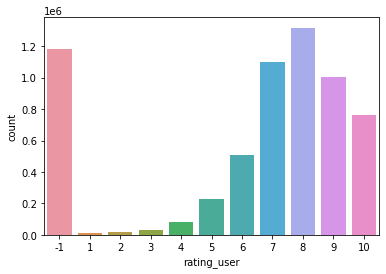

In [100]:
sns.countplot(data_train['rating_user'])

- We can see that most of the users have given rating above 7.
- Anime with an rating below 7 usually might not be that good so it can be made as a seperate group which might help in the recommendation.

Setting a threshold of 1552 on members of the anime based on the median value as it helps in the further analysis.

In [101]:
anime_members = df_anime[df_anime['members']>1552]
print("Max rating" , anime_members['rating'].max() ,
      " \nAnime name:", anime_members[anime_members['rating']==anime_members['rating'].max()]['name'].values[0],
     "\nAnime members:" ,anime_members[anime_members['rating']==anime_members['rating'].max()]['members'].values[0])

Max rating 9.37  
Anime name: Kimi no Na wa 
Anime members: 200630


In [102]:
print("Min rating" , anime_members['rating'].min() ,
      " \nAnime name:", anime_members[anime_members['rating']==anime_members['rating'].min()]['name'].values[0],
     "\nAnime members:" ,anime_members[anime_members['rating']==anime_members['rating'].min()]['members'].values[0])

Min rating 2.0  
Anime name: Tenkuu Danzai SkelterHeaven 
Anime members: 7680


- From the above inference we can see that **Kimi no Na wa** is an expectional anime based on the animedb data and they have huge members associated with them.
- So its highly likely that an user who has seen the anime **Kimi no Na wa** and rated it above 9 would join as an anime member to have an healthy discussion to express their love for that anime.
- One Interesting observation is that the type of the anime is Movie so its not an episodic release. 
- So this arises a question if people like movie anime rahter than episodic anime.

In [103]:
anime_members

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,SteinsGate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12205,2862,Tokineiro,Hentai,OVA,2,5.22,2350
12207,6546,Pico My Little Summer Story,Yaoi,OVA,1,5.21,5551
12209,5391,Pico to Chico,"Hentai, Yaoi",OVA,1,5.19,29463
12213,4866,Pico x CoCo x Chico,"Hentai, Yaoi",OVA,1,5.16,27411
